In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy

In [2]:
from PIL import Image

img=Image.open("joconde.png")

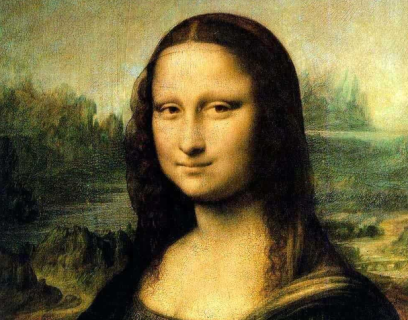

In [3]:
img

In [4]:
largeur,hauteur=img.size

In [5]:
def get_colors(img):
    (w,h) = img.size
    colors = []
    for x in range(w):
        for y in range(h):
            #r,v,b = img.getpixel((x,y))
            r,v,b,a = img.getpixel((x,y))
            colors.append([r,v,b])
    return colors

In [6]:
colors = get_colors(img)

In [7]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(colors)

In [8]:
def compress(img,kmeans):
    (w,h) = img.size
    labels = kmeans.labels_
    clusters= [[round(r), round(v), round(b)] for (r,v,b) in kmeans.cluster_centers_]
    c = 0
    for x in range(w):
        for y in range(h):
            (r,v,b) = clusters[labels[c]]
            img.putpixel((x,y),(r,v,b))
            c += 1
    return img

In [9]:
img_c2 = copy.deepcopy(img)
img_c2 = compress(img_c2,kmeans)

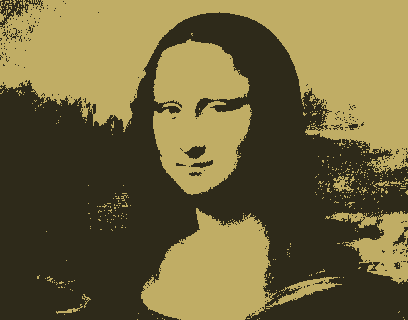

In [10]:
img_c2

In [11]:
img_c3 = copy.deepcopy(img)
kmeans = KMeans(n_clusters=4, n_init=10).fit(colors)
img_c3 = compress(img_c3,kmeans)

In [12]:
img_c10 = copy.deepcopy(img)
kmeans = KMeans(n_clusters=10, n_init=10).fit(colors)
img_c10 = compress(img_c10,kmeans)

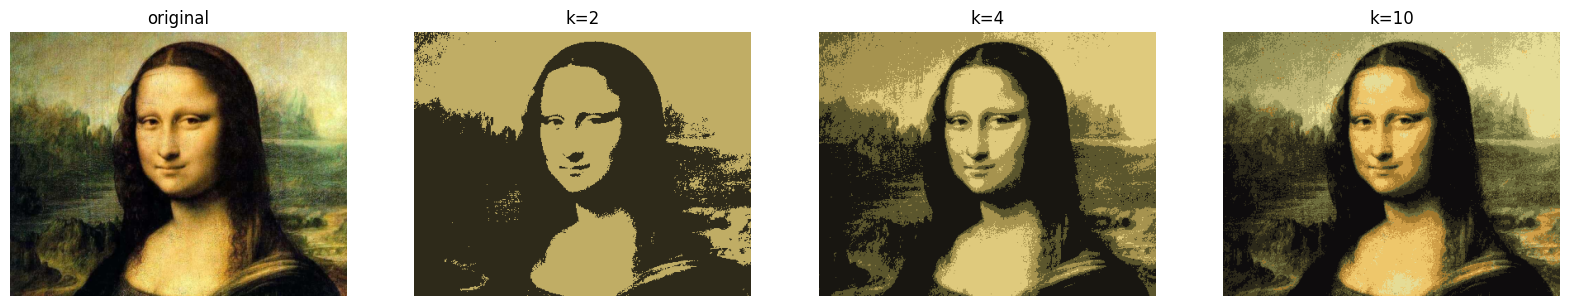

In [13]:
fig = plt.figure(figsize=(20, 14))

# setting values to rows and column variables
rows = 1
columns = 4

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img_c2)
plt.axis('off')
plt.title("k=2")

fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img_c3)
plt.axis('off')
plt.title("k=4")

fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(img_c10)
plt.axis('off')
plt.title("k=10");